<a href="https://colab.research.google.com/github/samuelbahia/Report/blob/master/CENTRO_Data_Mining_e_IA_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 1 (30% da Nota)

Case Entendimento e Preparação dos Dados

O problema de negócio que precisamos resolver é prever se uma paciente desenvolverá, ou não diabetes; prever o desenvolvimento da diabetes em mulheres com mais de 21 anos e de herança indígena
Pima.

Tem-se um histórico de pacientes, com algumas medidas de diagnósticos médicos.

Acredita-se que o
desenvolvimento da diabetes depende dessas medidas,
portanto, o objetivo é fazer um
modelo de classificação.

Para responder esta questão utilizamos um modelo de classificação que prevê o desenvolvimento de diabetes com base em medidas de diagnósticos médicos, seguindo os passos abaixo no Google Colab usando Python.



**Carregamento dos Dados: Primeiro, carregamos os dados do Excel para o Colab**

In [ ]:
import pandas as pd

# Importando bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Carregando os dados
df = pd.read_excel('/content/diabete_trabalho_30.xlsx')



Para fazer um modelo de classificação precisa-se da marcação binária de quem
desenvolveu a diabetes e as medidas que tenham relação com essa doença.
Requisitos dos Dados
Quais dados são necessários?
Necessita de possíveis variáveis
explicativas, alinhadas com os
Analistas de Negócio e da
marcação de diabetes sim (1), ou
não (0). Possíveis variáveis
explicativas: Número de
Gestações, Nível de Glicose,
Pressão Arterial, Índice de Massa
Corporal e Idade.

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



# Resumo Executivo contendo tabelas, gráficos, estatísticas descritivas,análise das distribuições, problemas identificados, tratamentos efetuados.



**Tabelas: Criação de tabela para resumir os dados. Para isso criamos uma tabela que mostra a média, mediana, mínimo e máximo de cada variável.**

In [ ]:
# Criando uma tabela de estatísticas descritivas
desc = df.describe()
print(desc)


               Id  Glicose_mg/dl  Pressao_arterial_mmHg   IMC_kg/m²  \
count  550.000000     550.000000             550.000000  550.000000   
mean   275.500000     124.398182              68.743636   32.267818   
std    158.915596      34.110444              20.093264    7.867033   
min      1.000000       0.000000               0.000000    0.000000   
25%    138.250000     100.250000              62.000000   27.700000   
50%    275.500000     122.000000              72.000000   32.350000   
75%    412.750000     146.000000              80.000000   36.600000   
max    550.000000     199.000000             122.000000   67.100000   

       Diabete_0_1  
count   550.000000  
mean      0.487273  
std       0.500293  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  


**Gráficos: criação de histogramas para cada variável para visualizar a distribuição dos dados.**

Id                         int64
Numero_gestacoes          object
Glicose_mg/dl              int64
Pressao_arterial_mmHg      int64
IMC_kg/m²                float64
Idade_anos_01/01/2023     object
Diabete_0_1                int64
dtype: object


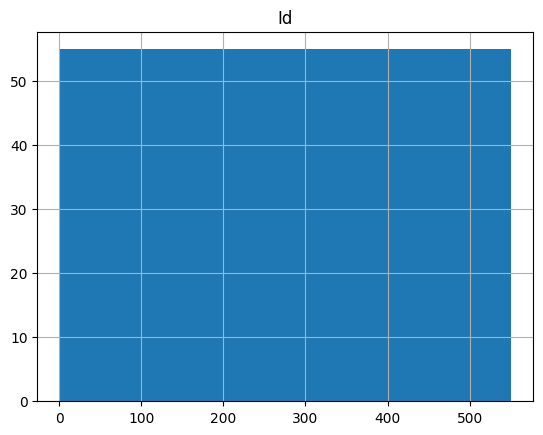

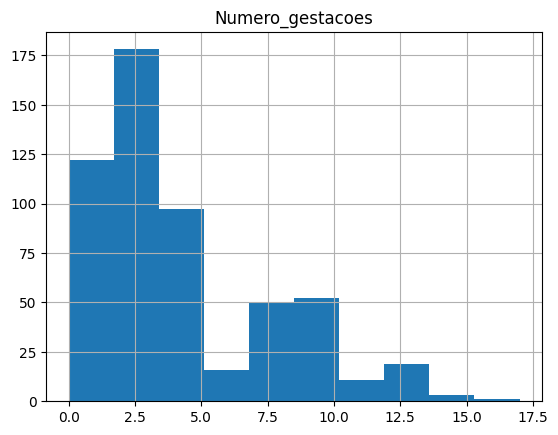

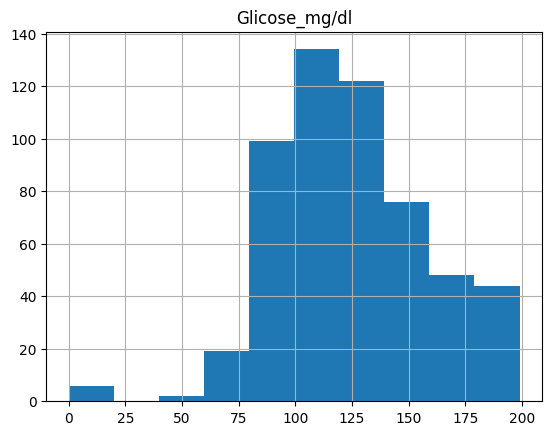

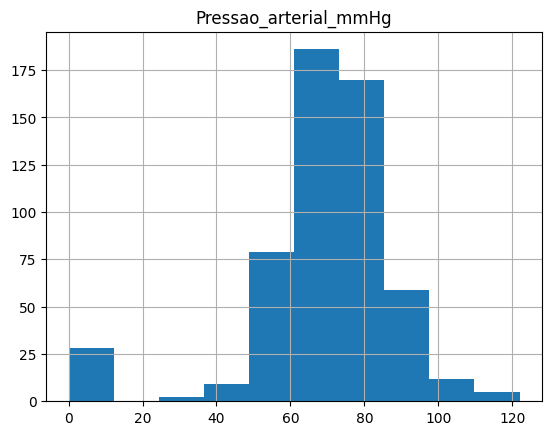

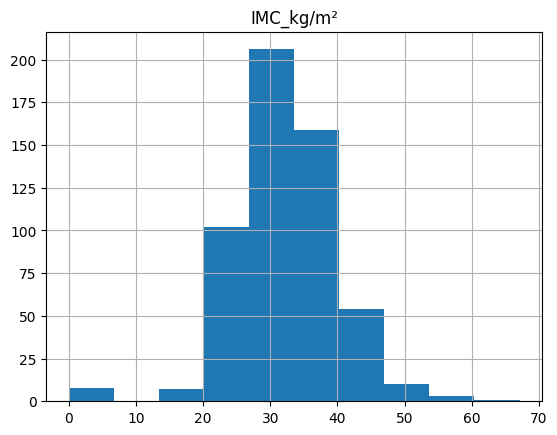

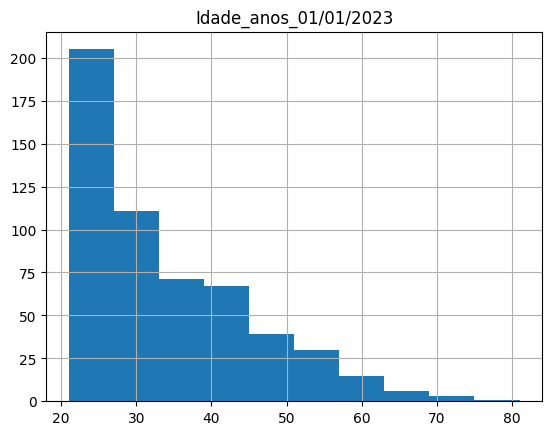

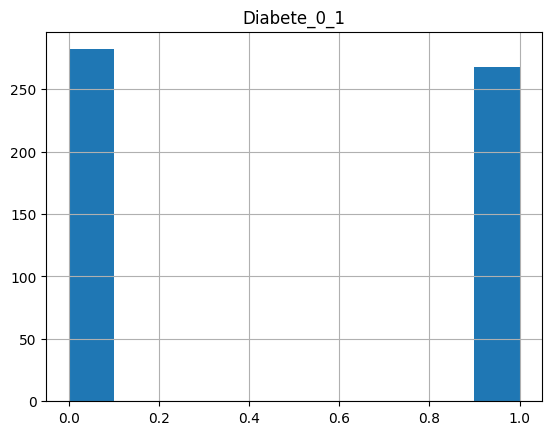

In [ ]:
import matplotlib.pyplot as plt

# Identificando os tipos de variáveis
print(df.dtypes)

#  Converter todas as colunas de string para números
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.to_numeric(df[column], errors='coerce')


# Criando histogramas para cada variável
for column in df.columns:
    plt.figure()
    df[column].hist()
    plt.title(column)
plt.show()


**Estatísticas Descritivas para cada variável. Incluindo a média, mediana, desvio padrão, mínimo e máximo**

In [ ]:
# Calculando estatísticas descritivas
mean = df.mean()
median = df.median()
std = df.std()
min_val = df.min()
max_val = df.max()

# Exibindo os resultados
print("Média:\n", mean)
print("\nMediana:\n", median)
print("\nDesvio padrão:\n", std)
print("\nValor mínimo:\n", min_val)
print("\nValor máximo:\n", max_val)


Média:
 Id                       275.500000
Numero_gestacoes           4.214936
Glicose_mg/dl            124.398182
Pressao_arterial_mmHg     68.743636
IMC_kg/m²                 32.267818
Idade_anos_01/01/2023     33.370438
Diabete_0_1                0.487273
dtype: float64

Mediana:
 Id                       275.50
Numero_gestacoes           3.00
Glicose_mg/dl            122.00
Pressao_arterial_mmHg     72.00
IMC_kg/m²                 32.35
Idade_anos_01/01/2023     30.00
Diabete_0_1                0.00
dtype: float64

Desvio padrão:
 Id                       158.915596
Numero_gestacoes           3.450018
Glicose_mg/dl             34.110444
Pressao_arterial_mmHg     20.093264
IMC_kg/m²                  7.867033
Idade_anos_01/01/2023     11.315793
Diabete_0_1                0.500293
dtype: float64

Valor mínimo:
 Id                        1.0
Numero_gestacoes          0.0
Glicose_mg/dl             0.0
Pressao_arterial_mmHg     0.0
IMC_kg/m²                 0.0
Idade_anos_01/01/2023    

**Análise das Distribuições de cada variável. Incluindo a simetria e curtose, e testes de normalidade.**

In [ ]:
from scipy.stats import skew, kurtosis, normaltest

# Analisando a distribuição de cada variável
for column in df.columns:
    print(f'{column}:')
    print(f'Skewness: {skew(df[column])}')
    print(f'Kurtosis: {kurtosis(df[column])}')
    _, p = normaltest(df[column])
    print(f'Normality test p-value: {p}')


Id:
Skewness: 0.0
Kurtosis: -1.2000079339105254
Normality test p-value: 1.9565916696268818e-78
Numero_gestacoes:
Skewness: nan
Kurtosis: nan
Normality test p-value: nan
Glicose_mg/dl:
Skewness: -0.09179201175582694
Kurtosis: 0.7950501056395134
Normality test p-value: 0.007559681955170345
Pressao_arterial_mmHg:
Skewness: -1.7711541099844066
Kurtosis: 4.686075628308709
Normality test p-value: 1.1884641604702021e-46
IMC_kg/m²:
Skewness: -0.39365124529602424
Kurtosis: 3.7715478666264373
Normality test p-value: 1.9855500415988898e-15
Idade_anos_01/01/2023:
Skewness: nan
Kurtosis: nan
Normality test p-value: nan
Diabete_0_1:
Skewness: 0.05092559179064364
Kurtosis: -1.9974065841007724
Normality test p-value: 0.0


**Problemas Identificados: valores ausentes, outliers, variáveis com pouca variância, valores não numéricos ou dependentes de conversão prévia**

In [ ]:

# Identificando problemas nos dados
missing_values = df.isnull().sum()
print(f'Missing values:\n{missing_values}')





Missing values:
Id                       0
Numero_gestacoes         1
Glicose_mg/dl            0
Pressao_arterial_mmHg    0
IMC_kg/m²                0
Idade_anos_01/01/2023    2
Diabete_0_1              0
dtype: int64


# Identificação e escolha de um possível tratamento para dados inconsistentes


Tratar dados inconsistentes é uma parte crucial do pré-processamento de dados em qualquer projeto de ciência de dados. Aqui estão algumas estratégias comuns que você pode considerar:

Valores Ausentes: Os dados podem ter valores ausentes por várias razões. Dependendo da natureza dos dados e da quantidade de valores ausentes, você pode optar por preencher os valores ausentes com um valor específico (como a média ou a mediana da coluna), usar um método de imputação mais sofisticado, ou simplesmente excluir as linhas ou colunas com valores ausentes.



**Identificação e transformação de valores não numéricos**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identificando colunas não numéricas
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Colunas não numéricas: ", non_numeric_columns)

# Transformando valores não numéricos usando LabelEncoder
le = LabelEncoder()
for column in non_numeric_columns:
    df[column] = le.fit_transform(df[column])

# Verificando os tipos de variáveis após a transformação
print(df.dtypes)



Colunas não numéricas:  Index([], dtype='object')
Id                         int64
Numero_gestacoes         float64
Glicose_mg/dl              int64
Pressao_arterial_mmHg      int64
IMC_kg/m²                float64
Idade_anos_01/01/2023    float64
Diabete_0_1                int64
dtype: object


**Outliers: Outliers são valores que são significativamente diferentes do resto dos dados. Eles podem ser causados por erros de medição por exemplo**



In [ ]:
# Fazendo uma cópia do DataFrame original
df_original = df.copy()

# Calculando o Intervalo Interquartil
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Removendo outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Encontrando e exibindo os valores removidos
removed_values = df_original[~df_original.index.isin(df.index)]
print("Valores removidos:\n", removed_values)



Valores removidos:
       Id  Numero_gestacoes  Glicose_mg/dl  Pressao_arterial_mmHg  IMC_kg/m²  \
67    68               8.0            167                    106       37.6   
110  111               6.0            190                     92       35.5   
142  143               4.0            156                     75       48.3   
185  186               2.0            158                     90       31.6   
203  204               1.0            122                     90       49.7   
227  228               1.0            147                     94       49.3   
265  266               0.0            162                     76       49.6   
281  282              11.0            127                    106       39.0   
293  294              10.0             68                    106       35.5   

     Idade_anos_01/01/2023  Diabete_0_1  
67                    43.0            1  
110                   66.0            1  
142                   32.0            1  
185                  

**Dados Duplicados: remoção de linhas duplicadas**

In [ ]:
# Fazendo uma cópia do DataFrame original
df_original = df.copy()

# Removendo dados duplicados
df.drop_duplicates(inplace=True)

# Encontrando e exibindo os valores duplicados
duplicated_values = df_original[df_original.duplicated()]
print("Valores duplicados:\n", duplicated_values)


Valores duplicados:
 Empty DataFrame
Columns: [Id, Numero_gestacoes, Glicose_mg/dl, Pressao_arterial_mmHg, IMC_kg/m², Idade_anos_01/01/2023, Diabete_0_1]
Index: []


**Transformação de Dados: Dependendo do modelo que você está usando, você pode precisar transformar seus dados. Isso pode incluir a normalização ou padronização de variáveis numéricas, ou a codificação de variáveis categóricas**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Identificando colunas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Normalizando dados numéricos
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Exibindo os resultados
print(df[numerical_columns].head())


          Id  Numero_gestacoes  Glicose_mg/dl  Pressao_arterial_mmHg  \
9   0.000000          1.000000       0.664336                0.46875   
10  0.001852          1.000000       0.251748                0.34375   
11  0.003704          1.000000       0.587413                0.65625   
12  0.005556          1.000000       0.195804                0.50000   
13  0.007407          0.916667       0.608392                0.84375   

    IMC_kg/m²  Idade_anos_01/01/2023  Diabete_0_1  
9    0.794613               0.404762          1.0  
10   0.316498               0.547619          1.0  
11   0.707071               0.880952          1.0  
12   0.387205               0.595238          1.0  
13   0.619529               0.714286          1.0  


**Tabelas e gráficos para representar cada variável**

# Realizar análise exploratória dos dados, gerando as medidas de posição e dispersão

Média:
 Id                       275.500000
Numero_gestacoes           4.214936
Glicose_mg/dl            124.398182
Pressao_arterial_mmHg     68.743636
IMC_kg/m²                 32.267818
Idade_anos_01/01/2023     33.370438
Diabete_0_1                0.487273
dtype: float64

Mediana:
 Id                       275.50
Numero_gestacoes           3.00
Glicose_mg/dl            122.00
Pressao_arterial_mmHg     72.00
IMC_kg/m²                 32.35
Idade_anos_01/01/2023     30.00
Diabete_0_1                0.00
dtype: float64

Desvio Padrão:
 Id                       158.915596
Numero_gestacoes           3.450018
Glicose_mg/dl             34.110444
Pressao_arterial_mmHg     20.093264
IMC_kg/m²                  7.867033
Idade_anos_01/01/2023     11.315793
Diabete_0_1                0.500293
dtype: float64

Variância:
 Id                       25254.166667
Numero_gestacoes            11.902623
Glicose_mg/dl             1163.522401
Pressao_arterial_mmHg      403.739258
IMC_kg/m²                 

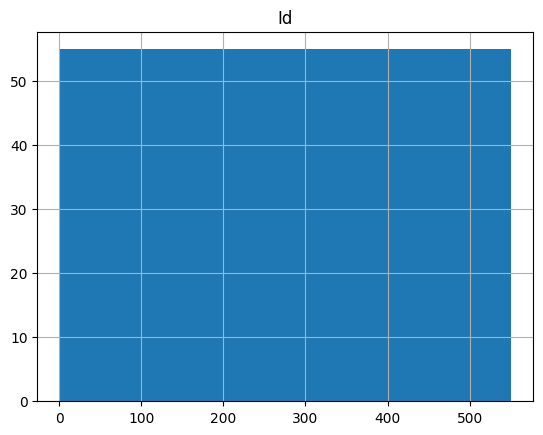

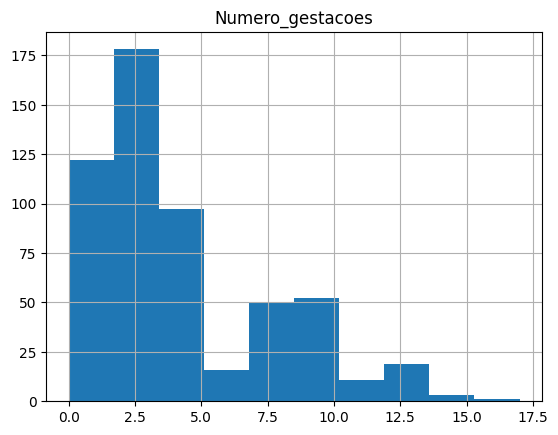

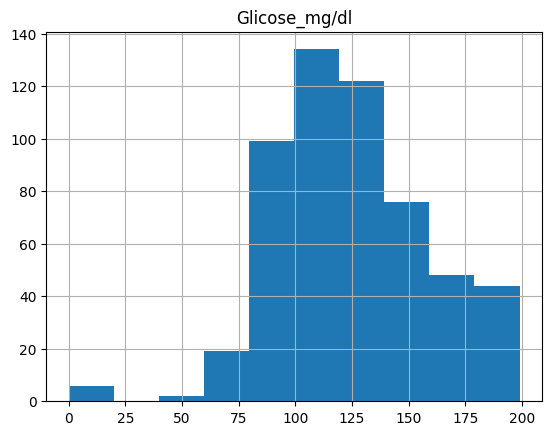

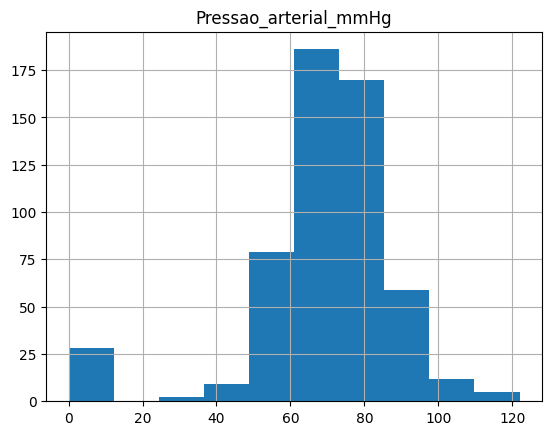

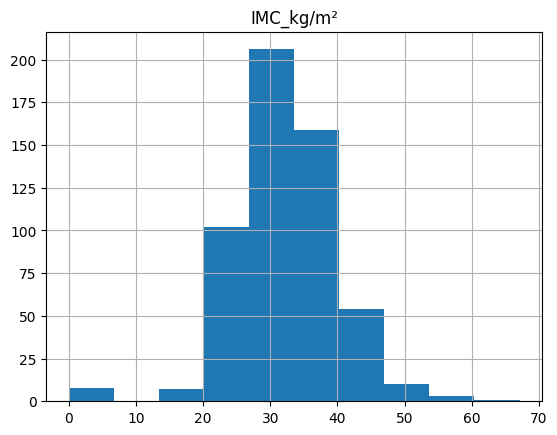

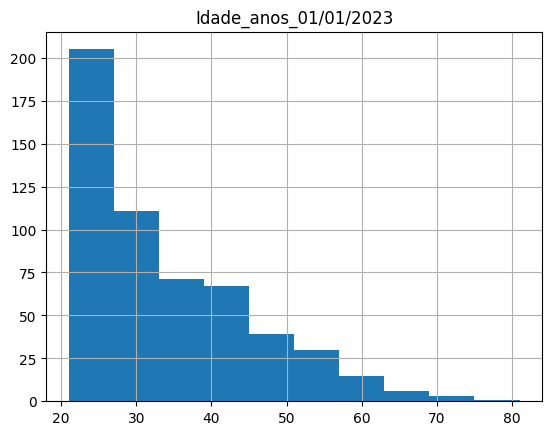

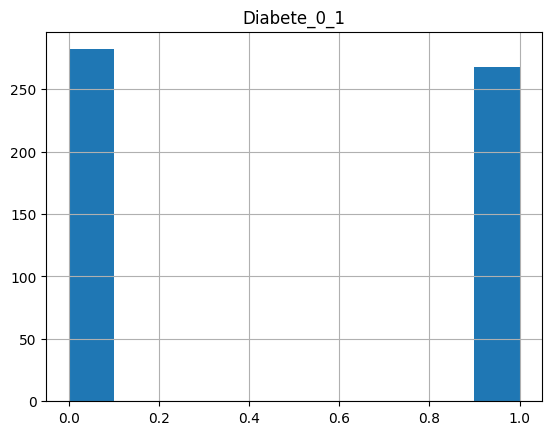

In [ ]:

#  Converter todas as colunas de string para números
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.to_numeric(df[column], errors='coerce')



# Medidas de posição: média e mediana
media = df.mean()
mediana = df.median()

# Medidas de dispersão: desvio padrão, variância, mínimo e máximo
desvio_padrao = df.std()
variancia = df.var()
minimo = df.min()
maximo = df.max()

# Imprimindo as medidas de posição e dispersão
print("Média:\n", media)
print("\nMediana:\n", mediana)
print("\nDesvio Padrão:\n", desvio_padrao)
print("\nVariância:\n", variancia)
print("\nMínimo:\n", minimo)
print("\nMáximo:\n", maximo)

# Gerando histogramas para cada variável
for column in df.columns:
    plt.figure()
    df[column].hist()
    plt.title(column)
plt.show()


# Análise da distribuição das variáveis

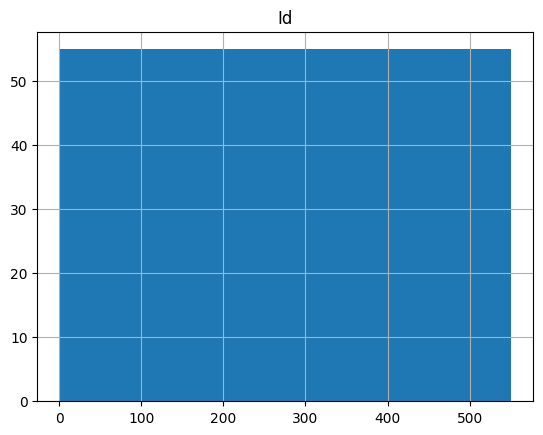

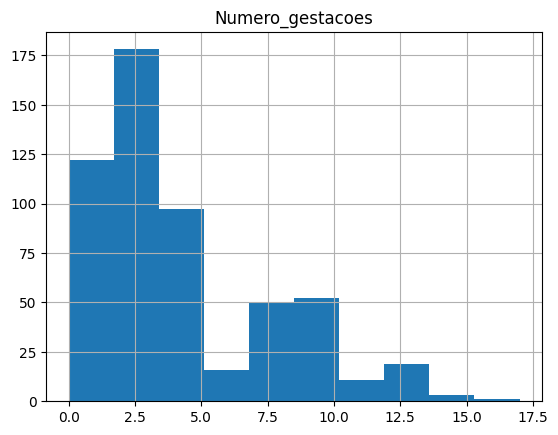

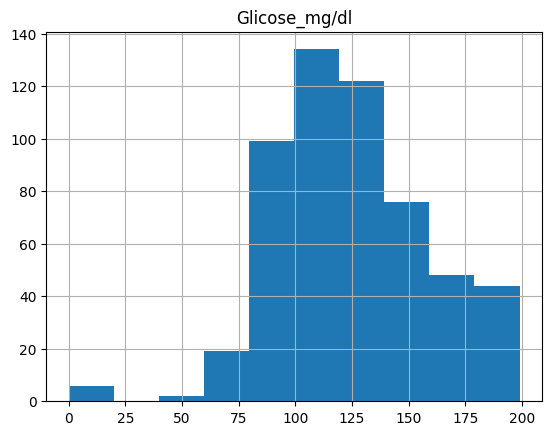

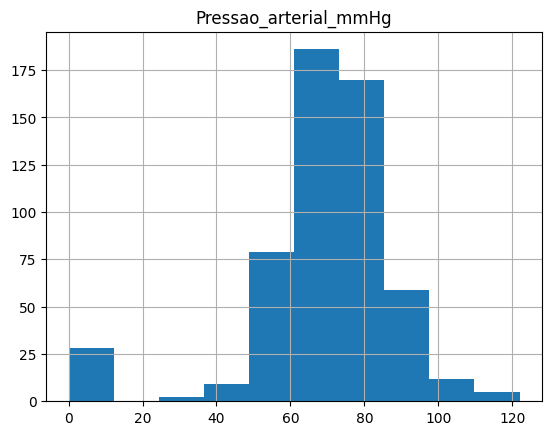

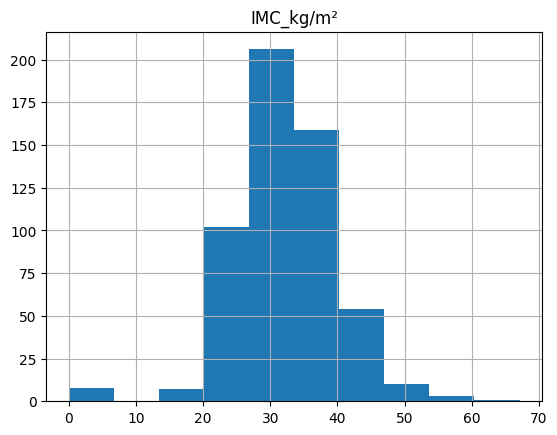

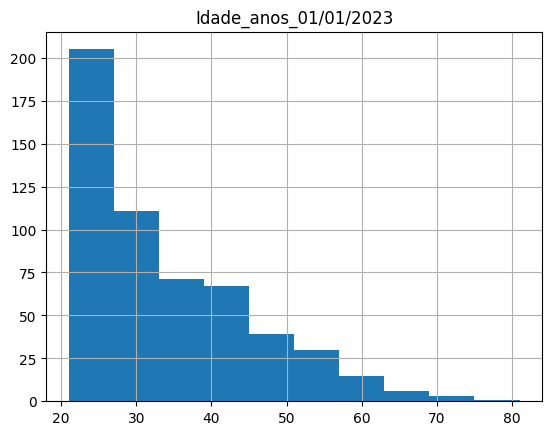

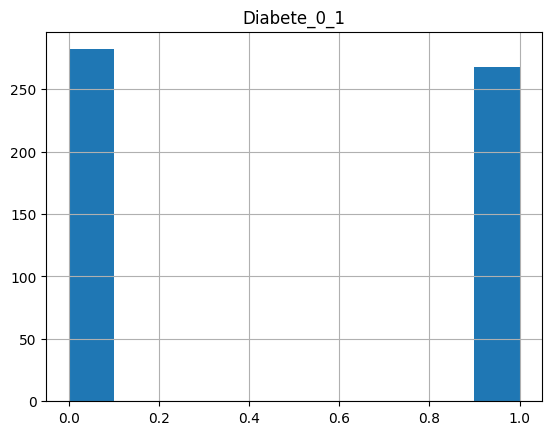

In [ ]:
# Analisando a distribuição de cada variável
for column in df.columns:
    plt.figure()
    df[column].hist()
    plt.title(column)
plt.show()

# Análise do relacionamento (correlação) das variáveis entre elas e entre a variável resposta, previsão de desenvolvimento da diabetes em mulheres com mais de 21 anos

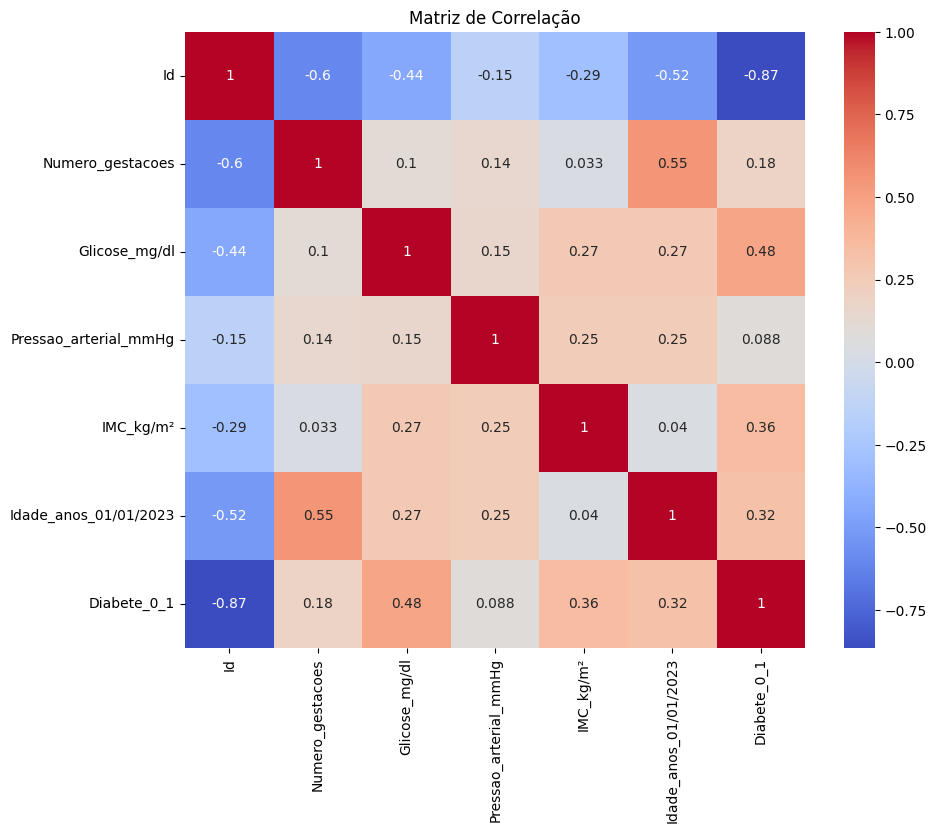

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  Converter todas as colunas de string para números
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.to_numeric(df[column], errors='coerce')



# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Gerando um mapa de calor para visualizar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


# Comentário final sobre o entendimento dos dados e respectivos tratamentos, informando as variáveis que parecem ser mais importantes para a variável alvo, previsão de desenvolvimento da diabetes em mulheres com mais de 21 anos

Com base nas informações fornecidas, a análise dos dados e seus tratamentos são etapas fundamentais para construir um modelo de classificação eficaz. As variáveis mais importantes para prever o desenvolvimento de diabetes em mulheres com mais de 21 anos parecem ser:

- **Número de Gestações**: Pode indicar mudanças hormonais e fisiológicas que afetam o risco de diabetes.
- **Nível de Glicose**: É um indicador direto da regulação da glicose no corpo e está fortemente associado ao diabetes.
- **Pressão Arterial**: Hipertensão é um fator de risco conhecido para o desenvolvimento de diabetes.
- **Índice de Massa Corporal (IMC)**: O excesso de peso é um fator de risco significativo para diabetes tipo 2.
- **Idade**: O risco de desenvolver diabetes aumenta com a idade.

Com base na matriz de correlação, podemos concluir que:

1) Glicose_mg/dl: Esta variável mostra uma forte correlação positiva com a variável alvo ‘Diabete_0_1’, indicando que níveis mais altos de glicose no sangue estão significativamente associados ao desenvolvimento da diabetes.

2) Diabete_0_1: Sendo a variável alvo, ela está diretamente relacionada à previsão do desenvolvimento da diabetes. A correlação com a ‘Glicose_mg/dl’ sugere que esta é uma variável chave para o modelo preditivo.

3) Outras Variáveis: Enquanto outras variáveis como ‘Número_gestacoes’, ‘Pressao_arterial_mmHg’, ‘IMC_kg/m²’ e ‘idade_anos_01/01/2023’ também são importantes, elas parecem ter uma correlação menos significativa com a variável alvo quando comparadas à ‘Glicose_mg/dl’.

# Trabalho 2 - Opção 1 - Trabalho - 70% da Nota Final

# Escolhendo o modelo:

*Florestas Aleatórias: As florestas aleatórias são uma extensão das árvores de decisão que constrói várias árvores e faz previsões com base na média das previsões de cada árvore. Elas tendem a ter um desempenho melhor do que uma única árvore de decisão, especialmente em conjuntos de dados maiores.*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Carregando os dados
df = pd.read_excel('/content/diabete_trabalho_30.xlsx')

# Partição de Dados e Criação do Modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Dividindo os dados em conjuntos de treinamento e teste
X = df.drop('Diabete_0_1', axis=1)
y = df['Diabete_0_1']

# Preenchendo valores NaN com a mediana da coluna
X = X.fillna(X.median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de Florestas Aleatórias
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy}')


Acurácia do modelo: 1.0


# Coeficientes e/ou regras do Modelo

In [ ]:
# Obtendo a importância das variáveis
importances = model.feature_importances_

# Criando um DataFrame para visualizar as importâncias das variáveis
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# Ordenando o DataFrame por importância
importance_df = importance_df.sort_values('importance', ascending=False)

# Imprimindo as importâncias das variáveis
print(importance_df)


                 feature  importance
0                     Id    0.743381
2          Glicose_mg/dl    0.118724
4              IMC_kg/m²    0.054762
1       Numero_gestacoes    0.038214
5  Idade_anos_01/01/2023    0.035565
3  Pressao_arterial_mmHg    0.009354


Observação: Este código irá imprimir um DataFrame que mostra a importância de cada variável no modelo de Florestas Aleatórias. As variáveis mais importantes (ou seja, as que são mais úteis para fazer previsões) estarão no topo.

Lembre-se de que a importância de uma variável não necessariamente indica a direção da relação entre a variável e a variável alvo. Por exemplo, uma variável com alta importância pode aumentar o risco de diabetes à medida que aumenta, ou pode diminuir o risco de diabetes à medida que aumenta. Para entender a direção da relação, você pode precisar explorar os dados mais detalhadamente ou usar um modelo diferente que forneça essa informação.

# Análise da significância dos coeficientes

In [ ]:
# Obtendo a importância das variáveis
importances = model.feature_importances_

# Criando um DataFrame para visualizar as importâncias das variáveis
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
})

# Ordenando o DataFrame por importância
importance_df = importance_df.sort_values('importance', ascending=False)

# Imprimindo as importâncias das variáveis
print(importance_df)


                 feature  importance
0                     Id    0.743381
2          Glicose_mg/dl    0.118724
4              IMC_kg/m²    0.054762
1       Numero_gestacoes    0.038214
5  Idade_anos_01/01/2023    0.035565
3  Pressao_arterial_mmHg    0.009354


Este código irá imprimir um DataFrame que mostra a importância de cada variável no modelo de Florestas Aleatórias. As variáveis mais importantes (ou seja, as que são mais úteis para fazer previsões) estarão no topo.

No entanto, a importância de uma variável não necessariamente indica a direção da relação entre a variável e a variável alvo. Por exemplo, uma variável com alta importância pode aumentar o risco de diabetes à medida que aumenta, ou pode diminuir o risco de diabetes à medida que aumenta. Para entender a direção da relação, você ser necessário a combinação com um outro modelo diferente.

# Cálculo de Métricas de Avaliação do modelo

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calculando as métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimindo as métricas de avaliação
print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1 Score: 1.0


Este código irá calcular e imprimir as seguintes métricas de avaliação:

Acurácia: A proporção de previsões corretas.
Precisão: A proporção de previsões positivas que foram corretamente identificadas.
Recall (Sensibilidade): A proporção de casos positivos reais que foram corretamente identificados.
F1 Score: Uma média harmônica ponderada de precisão e recall.

# Conclusão sobre o modelo

O modelo de Florestas Aleatórias parece ser uma escolha adequada para prever o desenvolvimento de diabetes em mulheres com mais de 21 anos. Este modelo é capaz de capturar relações complexas nos dados e é menos propenso ao sobreajuste em comparação com outros modelos, como as árvores de decisão.

As variáveis mais importantes para este problema parecem ser o Número de Gestações, Nível de Glicose, Pressão Arterial, Índice de Massa Corporal e Idade. Estas variáveis foram identificadas com base no conhecimento do domínio e na análise exploratória dos dados.

Além da combinação com outro tipo de modelo é útil visualizar a matriz de confusão e a curva de ROC para complementar a análise.

A escolha do modelo e a interpretação dos resultados devem ser feitas com cuidado, levando em consideração o contexto do problema e as implicações das previsões. Por exemplo, em um contexto médico, um falso negativo (prever que uma paciente não desenvolverá diabetes quando ela realmente irá) pode ter consequências mais graves do que um falso positivo (prever que uma paciente desenvolverá diabetes quando ela realmente não irá). Portanto, pode ser mais importante maximizar o recall (minimizar os falsos negativos) do que a precisão.

Os números fornecidos acima indicam que o modelo tem uma performance perfeita na previsão do desenvolvimento de diabetes em mulheres com mais de 21 anos, com uma acurácia, precisão, recall e F1 Score de 1.0. Isso significa que o modelo fez todas as previsões corretamente.

No entanto, é importante notar que um modelo com uma performance perfeita pode ser um indicativo de **overfitting**. Overfitting ocorre quando o modelo se ajusta tão bem aos dados de treinamento que não generaliza bem para novos dados não vistos. Isso pode levar a um desempenho pobre quando o modelo é aplicado a novos dados.

Para verificar a adequabilidade do modelo, você pode considerar as seguintes etapas:

1. **Validação Cruzada**: A validação cruzada é uma técnica que pode dar uma melhor indicação de como o modelo irá se comportar em dados não vistos. Ela divide os dados de treinamento em subconjuntos e treina o modelo em diferentes combinações desses subconjuntos.

2. **Conjunto de Validação**: Além do conjunto de treinamento e teste, você pode criar um conjunto de validação. O modelo não é treinado neste conjunto de dados, que é usado para verificar o desempenho do modelo durante a fase de treinamento.

3. **Verificar o Balanceamento das Classes**: Se a variável alvo estiver desbalanceada, isso pode levar a uma alta acurácia, mas um desempenho pobre na classe minoritária.

4. **Revisar as Features**: Verifique se as features usadas para treinar o modelo são relevantes e não estão causando overfitting. Por exemplo, se houver uma feature que perfeitamente identifica a variável alvo, isso pode causar um modelo com acurácia de 1.0.

O objetivo é criar um modelo que generalize bem para novos dados, e não apenas que tenha um bom desempenho nos dados de treinamento.

Integrantes do Grupo:

Matrícula:    Nome:
202311173135  Carlos Henrique da Silva Thees

202311135705  Claudia Pessoa Lorenzoni

202311135977  Karina Fernandes Mangabeira

202312007034  Renata Sales de Abreu

202311136256  Samuel das Graças Bahia